In [ ]:
#Importer les modules:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
import colorama
from colorama import Fore
from colorama import Style
import os, sys
import matplotlib
from matplotlib import cm
from matplotlib.patches import Circle, Wedge, Rectangle
from math import log10

import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.formula.api import ols


import ast
import scipy.stats as stats
import re
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn.inspection import permutation_importance
import math
from datetime import datetime
from datetime import timedelta, date

from functools import reduce
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import homogeneity_score, adjusted_rand_score, adjusted_mutual_info_score

from sklearn.neighbors import NearestNeighbors
import plotly.express as px
from kneed import KneeLocator
from sklearn import metrics
from sklearn.cluster import DBSCAN
#from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
print("No Warning Shown")

No Warning Shown


In [ ]:
#A. IMPORTER LES DONNÉES:

In [3]:
cd Desktop\Data Science candidature\Projets\Projet 5\Data\

C:\Users\'titite\Desktop\Data Science candidature\Projets\Projet 5\Data


In [4]:
ls

 Le volume dans le lecteur C s'appelle OS
 Le num‚ro de s‚rie du volume est 609B-8774

 R‚pertoire de C:\Users\'titite\Desktop\Data Science candidature\Projets\Projet 5\Data

28/07/2022  08:29    <DIR>          .
28/07/2022  08:29    <DIR>          ..
23/06/2022  17:27        44ÿ717ÿ580 archive.zip
29/07/2022  10:50         7ÿ104ÿ383 Data.csv
29/07/2022  10:51        14ÿ961ÿ819 Data_norm.csv
29/07/2022  10:51         9ÿ534ÿ280 Data_sim.csv
29/07/2022  10:51        21ÿ680ÿ630 Data_sim2.csv
01/10/2021  19:08         9ÿ033ÿ957 olist_customers_dataset.csv
01/10/2021  19:08        61ÿ273ÿ883 olist_geolocation_dataset.csv
01/10/2021  19:08        15ÿ438ÿ671 olist_order_items_dataset.csv
01/10/2021  19:08         5ÿ777ÿ138 olist_order_payments_dataset.csv
01/10/2021  19:08        14ÿ451ÿ670 olist_order_reviews_dataset.csv
16/07/2022  00:55         8ÿ154ÿ045 olist_order_reviews_dataset.ods
01/10/2021  19:08        17ÿ654ÿ914 olist_orders_dataset.csv
01/10/2021  19:08         2ÿ379ÿ446 olist_pr

In [ ]:
#A.1 On importe le dataset (sans les variables pour calcul des variables RFM)  pour la simulation.

In [5]:
df_s=pd.read_csv('Data_sim.csv', sep=',', low_memory=False)

In [6]:
df_s.count()

customer_unique_id                                         98665
Date_du_dernier_achat_par_client                           98665
Dataset_last_day                                           98665
R-recency                                                  98665
F-frequency                                                98665
Nombre_de_commandes_respectant_delais_livraison            98665
M-monetary                                                 98665
Diff_dépenses_produits_frais                               98665
review_score_moyen_moyenne_par_commande_par_client         98665
payment_sequential_moyenne_par_commande_par_client         98665
payment_installments_moyenne_par_commande_par_client       98665
Nombre_total_catégories_moyenne_par_commande_par_client    98665
Nombre_total_vendeurs_moyenne_par_commande_par_client      98665
Nombre_total_items_moyenne_par_commande_par_client         98665
dtype: int64

In [7]:
df_s=df_s.drop(['Nombre_de_commandes_respectant_delais_livraison',
                'Diff_dépenses_produits_frais',
                'review_score_moyen_moyenne_par_commande_par_client',
                'payment_sequential_moyenne_par_commande_par_client',
                'payment_installments_moyenne_par_commande_par_client',
                'Nombre_total_catégories_moyenne_par_commande_par_client',
                'Nombre_total_vendeurs_moyenne_par_commande_par_client',
                'Nombre_total_items_moyenne_par_commande_par_client'], axis=1)

In [ ]:
#ATTENTION: dans cette base on n'a pas regroupé encore par 'customer_unique_id'

In [ ]:
#test=df_s.loc[df_s['customer_unique_id'].isin(['8d50f5eadf50201ccdcedfb9e2ac8455'])]
#test

In [ ]:
#On regroupe par 'customer_unique_id'

In [8]:
df_s=df_s.drop_duplicates(subset =['customer_unique_id'])
df_s.count()

customer_unique_id                  95419
Date_du_dernier_achat_par_client    95419
Dataset_last_day                    95419
R-recency                           95419
F-frequency                         95419
M-monetary                          95419
dtype: int64

In [9]:
df_s.dtypes

customer_unique_id                   object
Date_du_dernier_achat_par_client     object
Dataset_last_day                     object
R-recency                             int64
F-frequency                           int64
M-monetary                          float64
dtype: object

In [10]:
df_s

,customer_unique_id,Date_du_dernier_achat_par_client,Dataset_last_day,R-recency,F-frequency,M-monetary
0,f7b62c75467e8ce080b201667cbbc274,2016-10-07,2018-09-03,697,2,168.05
1,d0b614ed8a43dca2f98a7c093723809d,2018-08-20,2018-09-03,15,1,212.82
2,71692b73230707ce0f95d8a6091c22b4,2018-08-09,2018-09-03,26,1,333.91
3,60ef1068bcbffaed11615482aeb7c8bf,2018-08-23,2018-09-03,12,1,150.27
4,8d43f7b8f33f60fb6ae5ec21072135b5,2018-08-09,2018-09-03,26,1,318.97
...,...,...,...,...,...,...
98658,e20f982ec35a961d9e018e56e47e7778,2018-02-14,2018-09-03,202,1,466.97
98660,8bd9c53ae5e194fd363ed6714235e6be,2018-01-01,2018-09-03,246,1,274.84
98661,99567d452c6589499a2ba8b0fd4658e5,2018-07-16,2018-09-03,50,1,664.43
98663,6f90ec5150be36c4475835b5941ab56f,2016-10-09,2018-09-03,695,1,406.92


In [11]:
df_s['Date_du_dernier_achat_par_client']=pd.to_datetime(df_s['Date_du_dernier_achat_par_client'])

In [12]:
df_s['Dataset_last_day']=pd.to_datetime(df_s['Dataset_last_day'])

In [13]:
df_s.dtypes

customer_unique_id                          object
Date_du_dernier_achat_par_client    datetime64[ns]
Dataset_last_day                    datetime64[ns]
R-recency                                    int64
F-frequency                                  int64
M-monetary                                 float64
dtype: object

In [14]:
df_s['a']=df_s['Dataset_last_day']-df_s['Date_du_dernier_achat_par_client']

In [15]:
df_s['diff_jours']=df_s['a'].dt.days

In [16]:
df_s.dtypes

customer_unique_id                           object
Date_du_dernier_achat_par_client     datetime64[ns]
Dataset_last_day                     datetime64[ns]
R-recency                                     int64
F-frequency                                   int64
M-monetary                                  float64
a                                   timedelta64[ns]
diff_jours                                    int64
dtype: object

In [ ]:
#A.2 On importe le dataset (avec les variables pour calcul des variables RFM) pour la simulation.

In [17]:
df_t=pd.read_csv('Data_sim2.csv', sep=',', low_memory=False)

In [18]:
df_t.count()

customer_unique_id                                         98665
order_id                                                   98665
review_score_moyen                                         98665
payment_value                                              98665
Prix_total_produits                                        98665
freight_value_total                                        98665
payment_sequential                                         98665
payment_type                                               98665
payment_installments                                       98665
customer_zip_code_prefix                                   98665
customer_city                                              98665
customer_state                                             98665
Nombre_total_catégories                                    98665
Nombre_total_vendeurs                                      98665
Nombre_total_items                                         98665
order_status             

In [ ]:
#Cette fois-ci on va pas droper les doublons en regroupant par client car on veut pouvoir recalculer la variable 
#'M-monetary'qui dépend du count des commandes effectuées.

In [19]:
df_t=df_t.drop(['review_score_moyen',
                'payment_sequential',
                'payment_installments',
                'payment_type',
                'customer_zip_code_prefix',
                'customer_city',
                'customer_state',
                'Nombre_total_catégories',
                'Nombre_total_vendeurs',
                'Nombre_total_items',
                'order_status',
                'Respect_temps_livraison',
                'payment_type',
                'Prix_total_produits',
                'freight_value_total',
                'Nombre_de_commandes_respectant_delais_livraison',
                'Diff_dépenses_produits_frais',
                'review_score_moyen_moyenne_par_commande_par_client',
                'payment_sequential_moyenne_par_commande_par_client',
                'payment_installments_moyenne_par_commande_par_client',
                'Nombre_total_catégories_moyenne_par_commande_par_client',
                'Nombre_total_vendeurs_moyenne_par_commande_par_client',
                'Nombre_total_items_moyenne_par_commande_par_client'], axis=1)

In [20]:
df_t.dtypes

customer_unique_id                   object
order_id                             object
payment_value                       float64
order_purchase_timestamp_NEW         object
Date_du_dernier_achat_par_client     object
Dataset_last_day                     object
R-recency                             int64
F-frequency                           int64
M-monetary                          float64
dtype: object

In [21]:
df_t

,customer_unique_id,order_id,payment_value,order_purchase_timestamp_NEW,Date_du_dernier_achat_par_client,Dataset_last_day,R-recency,F-frequency,M-monetary
0,f7b62c75467e8ce080b201667cbbc274,262118ce178bb3e4590a3adcf6d62e6b,126.12,2016-10-06,2016-10-07,2018-09-03,697,2,168.05
1,d0b614ed8a43dca2f98a7c093723809d,fd33085945f15975375cd8ec85440511,212.82,2018-08-20,2018-08-20,2018-09-03,15,1,212.82
2,71692b73230707ce0f95d8a6091c22b4,6e57e23ecac1ae881286657694444267,333.91,2018-08-09,2018-08-09,2018-09-03,26,1,333.91
3,60ef1068bcbffaed11615482aeb7c8bf,4154bf1348caac78152fe76e3e9c4af8,150.27,2018-08-23,2018-08-23,2018-09-03,12,1,150.27
4,8d43f7b8f33f60fb6ae5ec21072135b5,6dcf0aeb8b1eb4021c26e1d0e9394979,318.97,2018-08-09,2018-08-09,2018-09-03,26,1,318.97
...,...,...,...,...,...,...,...,...,...
98660,8bd9c53ae5e194fd363ed6714235e6be,70b7e94ea46d3e8b5bc12a50186edaf0,274.84,2018-01-01,2018-01-01,2018-09-03,246,1,274.84
98661,99567d452c6589499a2ba8b0fd4658e5,996c7e73600ad3723e8627ab7bef81e4,664.43,2018-07-16,2018-07-16,2018-09-03,50,1,664.43
98662,b8b3c435a58aebd788a477bed8342910,70b742795bc441e94a44a084b6d9ce7a,578.82,2017-08-24,2017-08-24,2018-09-03,376,3,919.34
98663,6f90ec5150be36c4475835b5941ab56f,6e5fe7366a2e1bfbf3257dba0af1267f,406.92,2016-10-09,2016-10-09,2018-09-03,695,1,406.92


In [22]:
df_t['Date_du_dernier_achat_par_client']=pd.to_datetime(df_t['Date_du_dernier_achat_par_client'])

In [23]:
df_t['Dataset_last_day']=pd.to_datetime(df_t['Dataset_last_day'])

In [24]:
df_t['order_purchase_timestamp_NEW']=pd.to_datetime(df_t['order_purchase_timestamp_NEW'])

In [25]:
df_t.dtypes

customer_unique_id                          object
order_id                                    object
payment_value                              float64
order_purchase_timestamp_NEW        datetime64[ns]
Date_du_dernier_achat_par_client    datetime64[ns]
Dataset_last_day                    datetime64[ns]
R-recency                                    int64
F-frequency                                  int64
M-monetary                                 float64
dtype: object

In [26]:
df_t['a']=df_t['Dataset_last_day']-df_t['Date_du_dernier_achat_par_client']

In [27]:
df_t['diff_jours']=df_t['a'].dt.days

In [28]:
df_t.dtypes

customer_unique_id                           object
order_id                                     object
payment_value                               float64
order_purchase_timestamp_NEW         datetime64[ns]
Date_du_dernier_achat_par_client     datetime64[ns]
Dataset_last_day                     datetime64[ns]
R-recency                                     int64
F-frequency                                   int64
M-monetary                                  float64
a                                   timedelta64[ns]
diff_jours                                    int64
dtype: object

In [ ]:
#---------------------------------------------------------------------------------------------------------------------------
#SANS RECALCUL DES VARIABLES RFM

#B Entraînement du modèle sur la base complète. 

In [29]:
RFM_1=df_s.loc[:,['R-recency','F-frequency','M-monetary']]

In [30]:
model=KMeans(n_clusters=3, random_state=1231).fit(RFM_1)
df_s['Cluster1']=model.labels_
df_s

,customer_unique_id,Date_du_dernier_achat_par_client,Dataset_last_day,R-recency,F-frequency,M-monetary,a,diff_jours,Cluster1
0,f7b62c75467e8ce080b201667cbbc274,2016-10-07,2018-09-03,697,2,168.05,696 days,696,2
1,d0b614ed8a43dca2f98a7c093723809d,2018-08-20,2018-09-03,15,1,212.82,14 days,14,0
2,71692b73230707ce0f95d8a6091c22b4,2018-08-09,2018-09-03,26,1,333.91,25 days,25,0
3,60ef1068bcbffaed11615482aeb7c8bf,2018-08-23,2018-09-03,12,1,150.27,11 days,11,0
4,8d43f7b8f33f60fb6ae5ec21072135b5,2018-08-09,2018-09-03,26,1,318.97,25 days,25,0
...,...,...,...,...,...,...,...,...,...
98658,e20f982ec35a961d9e018e56e47e7778,2018-02-14,2018-09-03,202,1,466.97,201 days,201,0
98660,8bd9c53ae5e194fd363ed6714235e6be,2018-01-01,2018-09-03,246,1,274.84,245 days,245,0
98661,99567d452c6589499a2ba8b0fd4658e5,2018-07-16,2018-09-03,50,1,664.43,49 days,49,1
98663,6f90ec5150be36c4475835b5941ab56f,2016-10-09,2018-09-03,695,1,406.92,694 days,694,2


In [31]:
df_s.describe()

,R-recency,F-frequency,M-monetary,a,diff_jours,Cluster1
count,95419.000000,95419.000000,95419.000000,95419,95419.000000,95419.000000
mean,244.496484,1.034018,166.070491,243 days 11:54:56.211446360,243.496484,0.852912
std,153.153950,0.211235,228.341907,153 days 03:41:41.250940148,153.153950,0.971392
min,1.000000,1.000000,9.590000,0 days 00:00:00,0.000000,0.000000
25%,120.000000,1.000000,63.100000,119 days 00:00:00,119.000000,0.000000
50%,225.000000,1.000000,107.950000,224 days 00:00:00,224.000000,0.000000
75%,354.000000,1.000000,183.270000,353 days 00:00:00,353.000000,2.000000
max,730.000000,16.000000,13664.080000,729 days 00:00:00,729.000000,2.000000


In [ ]:
#On a comme max 729/7=104.14 semaines (ie. un peu plus de 104 semaines).



#C. Étude de la prédiction.

#Afin d'avoir des résultats robustes, il faut que les intervalles de temps considérés soient 'courts mais pas trop'.
#Vu notre période de temps qui va de septembre 2016, jusqu'à septembre 2018, l'analyse des prédictions toutes les semaines
#semble adéquat.
#On a décidé, pour se faire, de considérer l'entraînement sur la base entière et ensuite on procédera à reculons pour les
#prédictions. Ainsi on enlèvera à chaque prédiction les semaines précédentes.

#Moins 1ère semaine.

In [32]:
df_s2=df_s.loc[(df_s['diff_jours'] >7)]
df_s2.count()

customer_unique_id                  95302
Date_du_dernier_achat_par_client    95302
Dataset_last_day                    95302
R-recency                           95302
F-frequency                         95302
M-monetary                          95302
a                                   95302
diff_jours                          95302
Cluster1                            95302
dtype: int64

In [33]:
RFM_2=df_s2.loc[:,['R-recency','F-frequency','M-monetary']]
RFM_2.count()

R-recency      95302
F-frequency    95302
M-monetary     95302
dtype: int64

In [34]:
prediction_1=model.predict(RFM_2)

In [ ]:
#On a comme max 729/7=104.14 semaines (ie. un peu plus de 104 semaines).



#C. Étude de la prédiction.

#Afin d'avoir des résultats robustes, il faut que les intervalles de temps considérés soient 'courts mais pas trop'.
#Vu notre période de temps qui va de septembre 2016, jusqu'à septembre 2018, l'analyse des prédictions toutes les semaines
#semble adéquat.
#On a décidé, pour se faire, de considérer l'entraînement sur la base entière et ensuite on procédera à reculons pour les
#prédictions. Ainsi on enlèvera à chaque prédiction les semaines précédentes.

#Moins 1ère semaine.prediction_1

In [35]:
df_s2['Cluster2']=prediction_1
df_s2

,customer_unique_id,Date_du_dernier_achat_par_client,Dataset_last_day,R-recency,F-frequency,M-monetary,a,diff_jours,Cluster1,Cluster2
0,f7b62c75467e8ce080b201667cbbc274,2016-10-07,2018-09-03,697,2,168.05,696 days,696,2,2
1,d0b614ed8a43dca2f98a7c093723809d,2018-08-20,2018-09-03,15,1,212.82,14 days,14,0,0
2,71692b73230707ce0f95d8a6091c22b4,2018-08-09,2018-09-03,26,1,333.91,25 days,25,0,0
3,60ef1068bcbffaed11615482aeb7c8bf,2018-08-23,2018-09-03,12,1,150.27,11 days,11,0,0
4,8d43f7b8f33f60fb6ae5ec21072135b5,2018-08-09,2018-09-03,26,1,318.97,25 days,25,0,0
...,...,...,...,...,...,...,...,...,...,...
98658,e20f982ec35a961d9e018e56e47e7778,2018-02-14,2018-09-03,202,1,466.97,201 days,201,0,0
98660,8bd9c53ae5e194fd363ed6714235e6be,2018-01-01,2018-09-03,246,1,274.84,245 days,245,0,0
98661,99567d452c6589499a2ba8b0fd4658e5,2018-07-16,2018-09-03,50,1,664.43,49 days,49,1,1
98663,6f90ec5150be36c4475835b5941ab56f,2016-10-09,2018-09-03,695,1,406.92,694 days,694,2,2


In [36]:
results_2=adjusted_rand_score(df_s2['Cluster2'], df_s2['Cluster1'])
results_2

1.0

In [ ]:
#Moins 100 semaines.

In [37]:
df_sa=df_s.loc[(df_s['diff_jours'] >700)]
df_sa.count()

customer_unique_id                  3
Date_du_dernier_achat_par_client    3
Dataset_last_day                    3
R-recency                           3
F-frequency                         3
M-monetary                          3
a                                   3
diff_jours                          3
Cluster1                            3
dtype: int64

In [38]:
RFM_a=df_sa.loc[:,['R-recency','F-frequency','M-monetary']]
RFM_a.count()

R-recency      3
F-frequency    3
M-monetary     3
dtype: int64

In [39]:
prediction_1=model.predict(RFM_a)

In [40]:
prediction_1

array([2, 2, 2])

In [41]:
df_sa['Clustera']=prediction_1
df_sa

,customer_unique_id,Date_du_dernier_achat_par_client,Dataset_last_day,R-recency,F-frequency,M-monetary,a,diff_jours,Cluster1,Clustera
3774,b7d76e111c89f7ebf14761390f0f7d17,2016-09-04,2018-09-03,730,1,136.23,729 days,729,2,2
28121,4854e9b3feff728c13ee5fc7d1547e92,2016-09-05,2018-09-03,729,1,75.06,728 days,728,2,2
79518,0eb1ee9dba87f5b36b4613a65074337c,2016-10-02,2018-09-03,702,1,109.34,701 days,701,2,2


In [42]:
results_2=adjusted_rand_score(df_s2['Cluster2'], df_s2['Cluster1'])
results_2

1.0

In [ ]:
#Automatisation

In [43]:
print("ARI entre les clusters")
print('Semaine   ARI')
print(53 * '_')

for i in range(103):
    df_s2=df_s.loc[(df_s['diff_jours'] >=7*(i+1))]
    RFM_2=df_s2.loc[:,['R-recency','F-frequency','M-monetary']]
    prediction_2=model.predict(RFM_2)
    df_s2['Cluster2']=prediction_2
    
    name="-"+str(i+1)+" sem."
    res= adjusted_rand_score(df_s2['Cluster1'], df_s2['Cluster2'])
    results = [name, res]
    
    print(*results)

ARI entre les clusters
Semaine   ARI
_____________________________________________________
-1 sem. 1.0
-2 sem. 1.0
-3 sem. 1.0
-4 sem. 1.0
-5 sem. 1.0
-6 sem. 1.0
-7 sem. 1.0
-8 sem. 1.0
-9 sem. 1.0
-10 sem. 1.0
-11 sem. 1.0
-12 sem. 1.0
-13 sem. 1.0
-14 sem. 1.0
-15 sem. 1.0
-16 sem. 1.0
-17 sem. 1.0
-18 sem. 1.0
-19 sem. 1.0
-20 sem. 1.0
-21 sem. 1.0
-22 sem. 1.0
-23 sem. 1.0
-24 sem. 1.0
-25 sem. 1.0
-26 sem. 1.0
-27 sem. 1.0
-28 sem. 1.0
-29 sem. 1.0
-30 sem. 1.0
-31 sem. 1.0
-32 sem. 1.0
-33 sem. 1.0
-34 sem. 1.0
-35 sem. 1.0
-36 sem. 1.0
-37 sem. 1.0
-38 sem. 1.0
-39 sem. 1.0
-40 sem. 1.0
-41 sem. 1.0
-42 sem. 1.0
-43 sem. 1.0
-44 sem. 1.0
-45 sem. 1.0
-46 sem. 1.0
-47 sem. 1.0
-48 sem. 1.0
-49 sem. 1.0
-50 sem. 1.0
-51 sem. 1.0
-52 sem. 1.0
-53 sem. 1.0
-54 sem. 1.0
-55 sem. 1.0
-56 sem. 1.0
-57 sem. 1.0
-58 sem. 1.0
-59 sem. 1.0
-60 sem. 1.0
-61 sem. 1.0
-62 sem. 1.0
-63 sem. 1.0
-64 sem. 1.0
-65 sem. 1.0
-66 sem. 1.0
-67 sem. 1.0
-68 sem. 1.0
-69 sem. 1.0
-70 sem. 1.0
-71 sem.

In [ ]:
#On ne voit pas de changement, quelque chose va mal, et c'est le fait que les variables RFM dépendent du data set, et si on
#enlève des semaines il faut les recalculer forcément. En fait pour rappel:

            # R (recency) — A quand remonte le dernier achat de chaque client? (ie. Durée depuis le dernier achat). 
            #              (Date de dernière commande du dataset entier +1 jour)-(date de la dernière commande).

            # F (frequency) — Combien de fois un client a-t-il passé des commandes pendant la période d'analyse?
            #                (Nombre de commandes sur la période d'analyse sélectionnée pour chaque client).

            # M (monetary) — Combien un client a-t-il dépensé au cours de la période analysée?
            #                Somme du montant des achats sur la période de temps pour chaque client.

#On va donc reprendre le base avant les calculs des variables RFM et les recalcules à chaque fois.

In [ ]:
#-----------------------------------------------------------------

In [ ]:
#---------------------------------------------------------------------------------------------------------------------------
#AVEC RECALCUL DES VARIABLES RFM
#Option 1: comparaison "Cluster1" -> cluster résultant du modèle sur base complète, avec "Cluster2" -> cluster résultant du
#.predict du modèle calculé sur base complète, mais appliqué sur la base sans x semaines.

#B Entraînement du modèle sur la base complète. 

#On va devoir regrouper par client, car la base ne l'est pas afin de pouvoir calculer à chaque fois qu'on enlève une 
#semaine la variable 'M-monetary' qui dépend du nombre de commander passées dans la période d'analyse. Néanmoins, on ne fait
#pas le regroupement en tout premier lieu afin d'avoir la clustérisation de référence ('Cluster1') associée à toutes les 
#lignes (même les doublons).

In [44]:
RFM_1=df_t.loc[:,['R-recency','F-frequency','M-monetary']]

In [45]:
model=KMeans(n_clusters=3, random_state=1231).fit(RFM_1)
df_t['Cluster1']=model.labels_
df_t

,customer_unique_id,order_id,payment_value,order_purchase_timestamp_NEW,Date_du_dernier_achat_par_client,Dataset_last_day,R-recency,F-frequency,M-monetary,a,diff_jours,Cluster1
0,f7b62c75467e8ce080b201667cbbc274,262118ce178bb3e4590a3adcf6d62e6b,126.12,2016-10-06,2016-10-07,2018-09-03,697,2,168.05,696 days,696,1
1,d0b614ed8a43dca2f98a7c093723809d,fd33085945f15975375cd8ec85440511,212.82,2018-08-20,2018-08-20,2018-09-03,15,1,212.82,14 days,14,0
2,71692b73230707ce0f95d8a6091c22b4,6e57e23ecac1ae881286657694444267,333.91,2018-08-09,2018-08-09,2018-09-03,26,1,333.91,25 days,25,0
3,60ef1068bcbffaed11615482aeb7c8bf,4154bf1348caac78152fe76e3e9c4af8,150.27,2018-08-23,2018-08-23,2018-09-03,12,1,150.27,11 days,11,0
4,8d43f7b8f33f60fb6ae5ec21072135b5,6dcf0aeb8b1eb4021c26e1d0e9394979,318.97,2018-08-09,2018-08-09,2018-09-03,26,1,318.97,25 days,25,0
...,...,...,...,...,...,...,...,...,...,...,...,...
98660,8bd9c53ae5e194fd363ed6714235e6be,70b7e94ea46d3e8b5bc12a50186edaf0,274.84,2018-01-01,2018-01-01,2018-09-03,246,1,274.84,245 days,245,0
98661,99567d452c6589499a2ba8b0fd4658e5,996c7e73600ad3723e8627ab7bef81e4,664.43,2018-07-16,2018-07-16,2018-09-03,50,1,664.43,49 days,49,2
98662,b8b3c435a58aebd788a477bed8342910,70b742795bc441e94a44a084b6d9ce7a,578.82,2017-08-24,2017-08-24,2018-09-03,376,3,919.34,375 days,375,2
98663,6f90ec5150be36c4475835b5941ab56f,6e5fe7366a2e1bfbf3257dba0af1267f,406.92,2016-10-09,2016-10-09,2018-09-03,695,1,406.92,694 days,694,1


In [ ]:
#test=df_t.loc[df_t['customer_unique_id'].isin(['8d50f5eadf50201ccdcedfb9e2ac8455'])]
#test

In [46]:
df_t1=df_t.copy()
df_t1=df_t1.drop_duplicates(subset =['customer_unique_id'])
df_t1.count()

customer_unique_id                  95419
order_id                            95419
payment_value                       95419
order_purchase_timestamp_NEW        95419
Date_du_dernier_achat_par_client    95419
Dataset_last_day                    95419
R-recency                           95419
F-frequency                         95419
M-monetary                          95419
a                                   95419
diff_jours                          95419
Cluster1                            95419
dtype: int64

In [47]:
df_t1.describe()

,payment_value,R-recency,F-frequency,M-monetary,a,diff_jours,Cluster1
count,95419.000000,95419.000000,95419.000000,95419.000000,95419,95419.000000,95419.000000
mean,161.100978,244.496484,1.034018,166.070491,243 days 11:54:56.211446360,243.496484,0.479066
std,221.822696,153.153950,0.211235,228.341907,153 days 03:41:41.250940148,153.153950,0.564862
min,9.590000,1.000000,1.000000,9.590000,0 days 00:00:00,0.000000,0.000000
25%,62.050000,120.000000,1.000000,63.100000,119 days 00:00:00,119.000000,0.000000
50%,105.520000,225.000000,1.000000,107.950000,224 days 00:00:00,224.000000,0.000000
75%,177.240000,354.000000,1.000000,183.270000,353 days 00:00:00,353.000000,1.000000
max,13664.080000,730.000000,16.000000,13664.080000,729 days 00:00:00,729.000000,2.000000


In [ ]:
#On a comme max 729/7=104.14 semaines (ie. un peu plus de 104 semaines).



#C. Étude de la prédiction.

#Afin d'avoir des résultats robustes, il faut que les intervalles de temps considérés soient 'courts mais pas trop'.
#Vu notre période de temps qui va de septembre 2016, jusqu'à septembre 2018, l'analyse des prédictions toutes les semaines
#semble adéquat.
#On a décidé, pour se faire, de considérer l'entraînement sur la base entière et ensuite on procédera à reculons pour les
#prédictions. Ainsi on enlèvera à chaque prédiction les semaines précédentes.

#C.1 Moins 1ère semaine.

#C.1.1 On commence par "loc" la base.

In [48]:
df_t2=df_t.loc[(df_t['diff_jours'] >7)]
df_t2.count()

customer_unique_id                  98539
order_id                            98539
payment_value                       98539
order_purchase_timestamp_NEW        98539
Date_du_dernier_achat_par_client    98539
Dataset_last_day                    98539
R-recency                           98539
F-frequency                         98539
M-monetary                          98539
a                                   98539
diff_jours                          98539
Cluster1                            98539
dtype: int64

In [ ]:
#df_t2

In [ ]:
#C.1.2 On calcule les nouvelles variable RFM pour cette nouvelle base.
#'R-recency'

In [49]:
df_t2['Date_du_dernier_achat_par_client']=df_t2.groupby('customer_unique_id')['order_purchase_timestamp_NEW'].transform(max)

In [50]:
df_t2['Dataset_last_day']=df_t2['order_purchase_timestamp_NEW'].max()

In [51]:
df_t2['R-recency']= ((df_t2['Dataset_last_day']+timedelta(days=1))-df_t2['Date_du_dernier_achat_par_client']).dt.days

In [ ]:
#df_t2

In [52]:
df_t2=df_t2.drop(['F-frequency', 'M-monetary'], axis=1)

In [ ]:
#'F-frequency'

In [53]:
F=df_t2.groupby(['customer_unique_id'], as_index=False)['order_id'].count()

In [54]:
F.rename(columns={'order_id': 'F-frequency'}, inplace=True)
#F

In [55]:
df_t2= pd.merge(df_t2, F, how='left', on='customer_unique_id')

In [ ]:
#df_t2

In [ ]:
#'M-monetary'

In [56]:
M=df_t2.loc[:,['customer_unique_id', 'payment_value']]
M=M.groupby(['customer_unique_id'], as_index=False).sum()
M.rename(columns={'payment_value': 'M-monetary'}, inplace=True)

In [57]:
df_t2= pd.merge(df_t2, M, how='left', on='customer_unique_id')

In [ ]:
#df_t2

In [ ]:
#C.1.3 On calcule les prédictions.

In [58]:
RFM_2=df_t2.loc[:,['R-recency','F-frequency','M-monetary']]
RFM_2.count()

R-recency      98539
F-frequency    98539
M-monetary     98539
dtype: int64

In [59]:
prediction_1=model.predict(RFM_2)

In [60]:
prediction_1

array([1, 0, 0, ..., 2, 1, 2])

In [61]:
df_t2['Cluster2']=prediction_1
#df_t2

In [62]:
results_2=adjusted_rand_score(df_t2['Cluster1'], df_t2['Cluster2'])
results_2

-0.848902507279809

In [ ]:
#Automatisation

In [63]:
print("ARI entre les clusters")
print('Semaine   ARI')
print(53 * '_')


for i in range(103):
    #C.1.1 On commence par "loc" la base.
    df_t2=df_t.loc[(df_t['diff_jours'] >7*(i+1))]
    
    #C.1.2 On calcule les nouvelles variable RFM pour cette nouvelle base.
    #'R-recency'
    df_t2['Date_du_dernier_achat_par_client']=df_t2.groupby('customer_unique_id')['order_purchase_timestamp_NEW'].transform(max)
    df_t2['Dataset_last_day']=df_t2['order_purchase_timestamp_NEW'].max()
    df_t2['R-recency']= ((df_t2['Dataset_last_day']+timedelta(days=1))-df_t2['Date_du_dernier_achat_par_client']).dt.days
    
    df_t2=df_t2.drop(['F-frequency', 'M-monetary'], axis=1)
    
    #'F-frequency'
    F=df_t2.groupby(['customer_unique_id'], as_index=False)['order_id'].count()
    F.rename(columns={'order_id': 'F-frequency'}, inplace=True)
    df_t2= pd.merge(df_t2, F, how='left', on='customer_unique_id')
    
    #'M-monetary'
    M=df_t2.loc[:,['customer_unique_id', 'payment_value']]
    M=M.groupby(['customer_unique_id'], as_index=False).sum()
    M.rename(columns={'payment_value': 'M-monetary'}, inplace=True)
    df_t2= pd.merge(df_t2, M, how='left', on='customer_unique_id')
    
    #C.1.3 On calcule les prédictions.
    RFM_2=df_t2.loc[:,['R-recency','F-frequency','M-monetary']]
    prediction_1=model.predict(RFM_2)
    df_t2['Cluster2']=prediction_1
    
    name="-"+str(i+1)+" sem."
    res= adjusted_rand_score(df_t2['Cluster1'], df_t2['Cluster2'])
    results = [name, res]
    
    print(*results)

ARI entre les clusters
Semaine   ARI
_____________________________________________________
-1 sem. -0.848902507279809
-2 sem. 0.24394310309047043
-3 sem. -1.227966482905113
-4 sem. -7.719263961512608
-5 sem. 7.058475749745104
-6 sem. 3.7961283896776417
-7 sem. -2.524565396977901
-8 sem. -1.8912713560534609
-9 sem. 1.5798088844895195
-10 sem. 1.718568244906802
-11 sem. 1.9816521949658072
-12 sem. 2.532770972434046
-13 sem. 3.858327318347242
-14 sem. 7.772287367515303
-15 sem. -52.218558468423915
-16 sem. -2.533727863668042
-17 sem. -1.026258909720536
-18 sem. -0.5775910801581022
-19 sem. -0.36201731293190276
-20 sem. -0.2357300603532109
-21 sem. -0.15814268801752185
-22 sem. 0.10661076713054417
-23 sem. 0.08825635733480126
-24 sem. 0.07196614900139046
-25 sem. 0.059139123286636334
-26 sem. 0.047578724310934906
-27 sem. 0.038617414089089475
-28 sem. 0.03470018567602584
-29 sem. 0.035414319160328965
-30 sem. 0.04153651833867275
-31 sem. 0.054600785805710886
-32 sem. 0.07462711735347273
-3

In [ ]:
#Comme ce que j'ai fait c'est enlever ds semaines en fait la lecture doit se faire à l'envers: 103 semaines -> 1 semaine.
#Pour que le ARI soit bon, il doit être >=0.8  du coup pour nous se serait à partir de 61 semaines en lecture à l'envers, 
#soit au bout de 43 semaines, soit tous les 10,75 mois. En gros tous les 10-11 mois (plutôt 10,5 mois pour être prévoyants).

In [ ]:
#-----------------------------------------------------------------

In [ ]:
#---------------------------------------------------------------------------------------------------------------------------
#AVEC RECALCUL DES VARIABLES RFM
#Option 2: comparaison "Cluster1" -> cluster résultant d'un apprentissage (ie. un nouveau modèle) sur base sans x semaines, 
#avec "Cluster2" -> cluster résultant du .predict du modèle calculé sur base complète, mais appliqué sur la base sans x 
#semaines.

#B Entraînement du modèle sur la base complète. 

#On va devoir regrouper par client, car la base ne l'est pas afin de pouvoir calculer à chaque fois qu'on enlève une 
#semaine la variable 'M-monetary' qui dépend du nombre de commander passées dans la période d'analyse. Néanmoins, on ne fait
#pas le regroupement en tout premier lieu afin d'avoir la clustérisation de référence ('Cluster1') associée à toutes les 
#lignes (même les doublons).

In [64]:
RFM_1=df_t.loc[:,['R-recency','F-frequency','M-monetary']]

In [65]:
model=KMeans(n_clusters=3, random_state=1231).fit(RFM_1)
df_t['Cluster1']=model.labels_
df_t

,customer_unique_id,order_id,payment_value,order_purchase_timestamp_NEW,Date_du_dernier_achat_par_client,Dataset_last_day,R-recency,F-frequency,M-monetary,a,diff_jours,Cluster1
0,f7b62c75467e8ce080b201667cbbc274,262118ce178bb3e4590a3adcf6d62e6b,126.12,2016-10-06,2016-10-07,2018-09-03,697,2,168.05,696 days,696,1
1,d0b614ed8a43dca2f98a7c093723809d,fd33085945f15975375cd8ec85440511,212.82,2018-08-20,2018-08-20,2018-09-03,15,1,212.82,14 days,14,0
2,71692b73230707ce0f95d8a6091c22b4,6e57e23ecac1ae881286657694444267,333.91,2018-08-09,2018-08-09,2018-09-03,26,1,333.91,25 days,25,0
3,60ef1068bcbffaed11615482aeb7c8bf,4154bf1348caac78152fe76e3e9c4af8,150.27,2018-08-23,2018-08-23,2018-09-03,12,1,150.27,11 days,11,0
4,8d43f7b8f33f60fb6ae5ec21072135b5,6dcf0aeb8b1eb4021c26e1d0e9394979,318.97,2018-08-09,2018-08-09,2018-09-03,26,1,318.97,25 days,25,0
...,...,...,...,...,...,...,...,...,...,...,...,...
98660,8bd9c53ae5e194fd363ed6714235e6be,70b7e94ea46d3e8b5bc12a50186edaf0,274.84,2018-01-01,2018-01-01,2018-09-03,246,1,274.84,245 days,245,0
98661,99567d452c6589499a2ba8b0fd4658e5,996c7e73600ad3723e8627ab7bef81e4,664.43,2018-07-16,2018-07-16,2018-09-03,50,1,664.43,49 days,49,2
98662,b8b3c435a58aebd788a477bed8342910,70b742795bc441e94a44a084b6d9ce7a,578.82,2017-08-24,2017-08-24,2018-09-03,376,3,919.34,375 days,375,2
98663,6f90ec5150be36c4475835b5941ab56f,6e5fe7366a2e1bfbf3257dba0af1267f,406.92,2016-10-09,2016-10-09,2018-09-03,695,1,406.92,694 days,694,1


In [ ]:
#test=df_t.loc[df_t['customer_unique_id'].isin(['8d50f5eadf50201ccdcedfb9e2ac8455'])]
#test

In [66]:
df_t1=df_t.copy()
df_t1=df_t1.drop_duplicates(subset =['customer_unique_id'])
df_t1.count()

customer_unique_id                  95419
order_id                            95419
payment_value                       95419
order_purchase_timestamp_NEW        95419
Date_du_dernier_achat_par_client    95419
Dataset_last_day                    95419
R-recency                           95419
F-frequency                         95419
M-monetary                          95419
a                                   95419
diff_jours                          95419
Cluster1                            95419
dtype: int64

In [67]:
df_t1.describe()

,payment_value,R-recency,F-frequency,M-monetary,a,diff_jours,Cluster1
count,95419.000000,95419.000000,95419.000000,95419.000000,95419,95419.000000,95419.000000
mean,161.100978,244.496484,1.034018,166.070491,243 days 11:54:56.211446360,243.496484,0.479066
std,221.822696,153.153950,0.211235,228.341907,153 days 03:41:41.250940148,153.153950,0.564862
min,9.590000,1.000000,1.000000,9.590000,0 days 00:00:00,0.000000,0.000000
25%,62.050000,120.000000,1.000000,63.100000,119 days 00:00:00,119.000000,0.000000
50%,105.520000,225.000000,1.000000,107.950000,224 days 00:00:00,224.000000,0.000000
75%,177.240000,354.000000,1.000000,183.270000,353 days 00:00:00,353.000000,1.000000
max,13664.080000,730.000000,16.000000,13664.080000,729 days 00:00:00,729.000000,2.000000


In [ ]:
#On a comme max 729/7=104.14 semaines (ie. un peu plus de 104 semaines).



#C. Étude de la prédiction.

#Afin d'avoir des résultats robustes, il faut que les intervalles de temps considérés soient 'courts mais pas trop'.
#Vu notre période de temps qui va de septembre 2016, jusqu'à septembre 2018, l'analyse des prédictions toutes les semaines
#semble adéquat.
#On a décidé, pour se faire, de considérer l'entraînement sur la base entière et ensuite on procédera à reculons pour les
#prédictions. Ainsi on enlèvera à chaque prédiction les semaines précédentes.

#C.1 Moins 1ère semaine.

#C.1.1 On commence par "loc" la base.

In [68]:
df_t2=df_t.loc[(df_t['diff_jours'] >7)]
df_t2.count()

customer_unique_id                  98539
order_id                            98539
payment_value                       98539
order_purchase_timestamp_NEW        98539
Date_du_dernier_achat_par_client    98539
Dataset_last_day                    98539
R-recency                           98539
F-frequency                         98539
M-monetary                          98539
a                                   98539
diff_jours                          98539
Cluster1                            98539
dtype: int64

In [ ]:
#df_t2

In [ ]:
#C.1.2 On calcule les nouvelles variable RFM pour cette nouvelle base.
#'R-recency'

In [69]:
df_t2['Date_du_dernier_achat_par_client']=df_t2.groupby('customer_unique_id')['order_purchase_timestamp_NEW'].transform(max)

In [70]:
df_t2['Dataset_last_day']=df_t2['order_purchase_timestamp_NEW'].max()

In [71]:
df_t2['R-recency']= ((df_t2['Dataset_last_day']+timedelta(days=1))-df_t2['Date_du_dernier_achat_par_client']).dt.days

In [ ]:
#df_t2

In [72]:
df_t2=df_t2.drop(['F-frequency', 'M-monetary'], axis=1)

In [ ]:
#'F-frequency'

In [73]:
F=df_t2.groupby(['customer_unique_id'], as_index=False)['order_id'].count()

In [74]:
F.rename(columns={'order_id': 'F-frequency'}, inplace=True)
#F

In [75]:
df_t2= pd.merge(df_t2, F, how='left', on='customer_unique_id')

In [ ]:
#df_t2

In [ ]:
#'M-monetary'

In [76]:
M=df_t2.loc[:,['customer_unique_id', 'payment_value']]
M=M.groupby(['customer_unique_id'], as_index=False).sum()
M.rename(columns={'payment_value': 'M-monetary'}, inplace=True)

In [77]:
df_t2= pd.merge(df_t2, M, how='left', on='customer_unique_id')

In [ ]:
#df_t2

In [ ]:
#C.1.3 On calcule un nouveau modèle sur la base avec 1 semaine en moins.

In [78]:
RFM_2=df_t2.loc[:,['R-recency','F-frequency','M-monetary']]
RFM_2.count()

R-recency      98539
F-frequency    98539
M-monetary     98539
dtype: int64

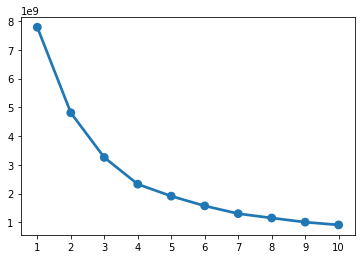

In [79]:
SSE_2=[]
for k in range(0,10):
    kmeans=KMeans(n_clusters=k+1, random_state=1231).fit(RFM_2)
    SSE_2.append(kmeans.inertia_)

sns.pointplot(x=list(range(1,11)),y=SSE_2)
plt.show()

In [80]:
kn= KneeLocator(list(range(1,11)),  #x values
                      SSE_2, # y values
                      curve="convex", #parameter from figure
                      direction="decreasing") #parameter from figureprint(kn.knee)

print(kn.knee)

4


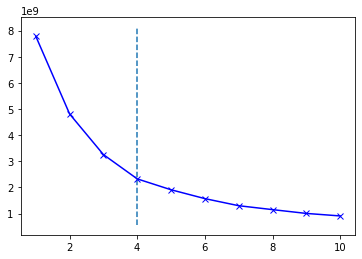

In [81]:
plt.plot(list(range(1,11)), SSE_2, 'bx-')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

In [82]:
model2=KMeans(n_clusters=kn.knee, random_state=1231).fit(RFM_2)
df_t2['Cluster1']=model2.labels_
df_t2

,customer_unique_id,order_id,payment_value,order_purchase_timestamp_NEW,Date_du_dernier_achat_par_client,Dataset_last_day,R-recency,a,diff_jours,Cluster1,F-frequency,M-monetary
0,f7b62c75467e8ce080b201667cbbc274,262118ce178bb3e4590a3adcf6d62e6b,126.12,2016-10-06,2016-10-07,2018-08-26,689,696 days,696,0,2,168.05
1,d0b614ed8a43dca2f98a7c093723809d,fd33085945f15975375cd8ec85440511,212.82,2018-08-20,2018-08-20,2018-08-26,7,14 days,14,2,1,212.82
2,71692b73230707ce0f95d8a6091c22b4,6e57e23ecac1ae881286657694444267,333.91,2018-08-09,2018-08-09,2018-08-26,18,25 days,25,2,1,333.91
3,60ef1068bcbffaed11615482aeb7c8bf,4154bf1348caac78152fe76e3e9c4af8,150.27,2018-08-23,2018-08-23,2018-08-26,4,11 days,11,2,1,150.27
4,8d43f7b8f33f60fb6ae5ec21072135b5,6dcf0aeb8b1eb4021c26e1d0e9394979,318.97,2018-08-09,2018-08-09,2018-08-26,18,25 days,25,2,1,318.97
...,...,...,...,...,...,...,...,...,...,...,...,...
98534,8bd9c53ae5e194fd363ed6714235e6be,70b7e94ea46d3e8b5bc12a50186edaf0,274.84,2018-01-01,2018-01-01,2018-08-26,238,245 days,245,2,1,274.84
98535,99567d452c6589499a2ba8b0fd4658e5,996c7e73600ad3723e8627ab7bef81e4,664.43,2018-07-16,2018-07-16,2018-08-26,42,49 days,49,3,1,664.43
98536,b8b3c435a58aebd788a477bed8342910,70b742795bc441e94a44a084b6d9ce7a,578.82,2017-08-24,2017-08-24,2018-08-26,368,375 days,375,3,3,919.34
98537,6f90ec5150be36c4475835b5941ab56f,6e5fe7366a2e1bfbf3257dba0af1267f,406.92,2016-10-09,2016-10-09,2018-08-26,687,694 days,694,0,1,406.92


In [ ]:
#C.1.4 On calcule les prédiction du modèle base complète.

In [83]:
prediction_1=model.predict(RFM_2)

In [84]:
prediction_1

array([1, 0, 0, ..., 2, 1, 2])

In [85]:
df_t2['Cluster2']=prediction_1
#df_t2

In [86]:
results_2=adjusted_rand_score(df_t2['Cluster1'], df_t2['Cluster2'])
results_2

-0.447348258622717

In [ ]:
#Automatisation

In [88]:
print("ARI entre les clusters")
print('Semaine   ARI')
print(53 * '_')


for i in range(103):
    #C.1.1 On commence par "loc" la base.
    df_t2=df_t.loc[(df_t['diff_jours'] >7*(i+1))]
    
    #C.1.2 On calcule les nouvelles variable RFM pour cette nouvelle base.
    #'R-recency'
    df_t2['Date_du_dernier_achat_par_client']=df_t2.groupby('customer_unique_id')['order_purchase_timestamp_NEW'].transform(max)
    df_t2['Dataset_last_day']=df_t2['order_purchase_timestamp_NEW'].max()
    df_t2['R-recency']= ((df_t2['Dataset_last_day']+timedelta(days=1))-df_t2['Date_du_dernier_achat_par_client']).dt.days
    
    df_t2=df_t2.drop(['F-frequency', 'M-monetary'], axis=1)
    
    #'F-frequency'
    F=df_t2.groupby(['customer_unique_id'], as_index=False)['order_id'].count()
    F.rename(columns={'order_id': 'F-frequency'}, inplace=True)
    df_t2= pd.merge(df_t2, F, how='left', on='customer_unique_id')
    
    #'M-monetary'
    M=df_t2.loc[:,['customer_unique_id', 'payment_value']]
    M=M.groupby(['customer_unique_id'], as_index=False).sum()
    M.rename(columns={'payment_value': 'M-monetary'}, inplace=True)
    df_t2= pd.merge(df_t2, M, how='left', on='customer_unique_id')
    
    #C.1.3 On calcule un nouveau modèle sur la base avec 1 semaine en moins.
    RFM_2=df_t2.loc[:,['R-recency','F-frequency','M-monetary']]
    kn= KneeLocator(list(range(1,11)),  #x values
                      SSE_2, # y values
                      curve="convex", #parameter from figure
                      direction="decreasing") #parameter from figureprint(kn.knee)
    model2=KMeans(n_clusters=3, random_state=1231).fit(RFM_2)
    df_t2['Cluster1']=model2.labels_
    
    #C.1.4 On calcule les prédictions.
    prediction_1=model.predict(RFM_2)
    df_t2['Cluster2']=prediction_1
    
    name="-"+str(i+1)+" sem."
    res= adjusted_rand_score(df_t2['Cluster1'], df_t2['Cluster2'])
    results = [name, res]
    
    print(*results)

ARI entre les clusters
Semaine   ARI
_____________________________________________________
-1 sem. -0.8673271867883785
-2 sem. 0.40906572483225845
-3 sem. -0.5690116369065127
-4 sem. 0.7127297098247481
-5 sem. 1.148190933323621
-6 sem. 1.1802515713526387
-7 sem. 1.181718696960971
-8 sem. 1.2750899041166155
-9 sem. -1.4934192062590284
-10 sem. -2.218263544355782
-11 sem. -3.380055634886571
-12 sem. 5.267547296720747
-13 sem. 8.73895707697325
-14 sem. 20.14806010609776
-15 sem. -62.25938534271311
-16 sem. -6.212642288060432
-17 sem. -2.8510645791499223
-18 sem. -1.7942500872701672
-19 sem. -1.2529306447649209
-20 sem. -0.9248686233450129
-21 sem. -0.7092915911652117
-22 sem. 0.5506847218200025
-23 sem. 0.5261797981174339
-24 sem. 0.5114353646384385
-25 sem. 0.1519163487109309
-26 sem. 0.15244035855304244
-27 sem. 0.1598989797098221
-28 sem. 0.16645912107479666
-29 sem. 0.17047167272561758
-30 sem. 0.17779211834805164
-31 sem. 0.18630778148148652
-32 sem. 0.19419343855831162
-33 sem. 0.20

ValueError: n_samples=2 should be >= n_clusters=3.

In [ ]:

#Si on recalcule le modèle sur les nouvelles bases le nombre de cluster optimal (le "k" optimal, l'elbow) peut varier d'une 
#d'une base à une autre se qui fait que les ARI sont moins bons ou bizarre. Vraiment la bonne approche est de comparer le
#cluster initial (avec les clients en moins car en enlevant des semaines on enlève potentiellement des clients), et de les
#comparer au .predict du modèle initial sur la base avec des semaines en moins. En fait comme pour la nouvelle base on 
#recalcule les RFM c'est vraiment comme si on rajouter des nouveau clients car les clients de la nouvelle base avec des 
#semaines en moins sont comme si ils étaient tous des nouveau clients car les RFM dépendent de la dernière date d'achat sur
#la base, de la somme des dépenses de clients sur la période de la base, et sur le nombre de commandes par clients sur la 
#période de la base, ce qui fait qu'en enlevant des semaines les caractéristiques des clients peuvent changer drastiquement 
#pour le mieux ou pour le pire.


#En fait quand on recalcule un modèle sur une base avec moins de données on a un modèle complètement différent a celui
#calculé avec plus de données, et ce car les RFM dépendent de la base. Ce que la machine 'apprend' alors est du coup très 
#différent selon le que le modèle soit calculé avec la base de donnée entière ou avec une base avec moins de données. 
# Si on faisait un graphique en 'cercle' des modèles c'est comme si c’étaient deux cercles complètement indépendants sans
#intersection.
#lorsque l'on compare le .predict sur une base avec x semaines de moins du modèle sur base complète, avec le cluster obtenu 
#avec la base complète c'est comme si on enlever (ou rajouté) un tout petit pourcentage des clients, du coup les RFM varient
#de peu. En une semaine de moins ou de plus on conserve en fait le 'gros' de notre base et donc le 'gros' notre modèle
#car les RFM dépendent de la base, et c’est pour ça que c'est bien ceci ce qu'il faut comparer. Si on comparer cette fois-ci
#les modèles a des cercles on aurait des cercles avec une intersection.